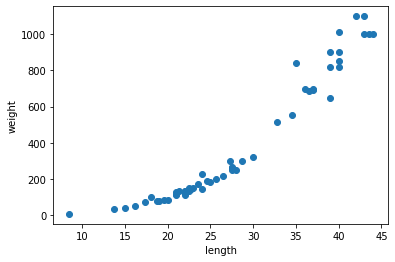

(42, 1) (42, 1)


In [ ]:
#3.1 k-최근접 이웃 회귀
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #사이킷 런에 사용할 훈련 세트는 2차원 배열이어야 함

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train_input, test_input, train_target, test_target=train_test_split(perch_length, perch_weight, random_state=42)
#크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape, train_input.shape)

In [ ]:
#사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor
'''
회귀의 경우 결정계수라고 부름
R**2=1-( (타킷-예측)**2의 합 / (타킷-평균)**2의 합 )
타깃의 평균 정도를 예측하는 수준이라면 R**2는 0에 가까워지고, 예측이 타깃에 아주 가까워지면 1에 가까운 값이 됨
'''
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input,test_target))

0.9928094061010639


In [ ]:
#mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듬
test_prediction=knr.predict(test_input)

#테스트 세트에 대한 평균 절대값 오차를 계산
mae=mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
#과대적합 vs 과소적합
'''
훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 과대적합이 되었다.
훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나주에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것

반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우 모델이 과소적합이 되었다.
모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우
'''
print(knr.score(train_input, train_target))

0.9698823289099255


In [ ]:
knr.n_neighbors=3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.974645996398761


[1033.33333333]


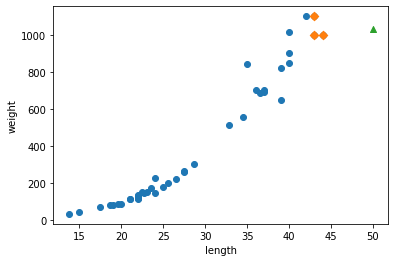

1033.3333333333333


In [ ]:
#3.2 선형 회귀
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #사이킷 런에 사용할 훈련 세트는 2차원 배열이어야 함
from sklearn.neighbors import KNeighborsRegressor

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target=train_test_split(perch_length, perch_weight, random_state=42)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

distances, indexes=knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(np.mean(train_target[indexes]))

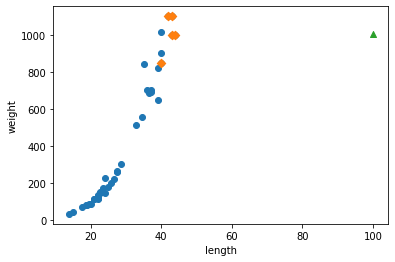

In [4]:
#100cm 농어의 이웃으르 구합니다.
distances, indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100cm 농어 데이터
plt.scatter(100,1003,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[1241.83860323]
[39.01714496] -709.0186449535477



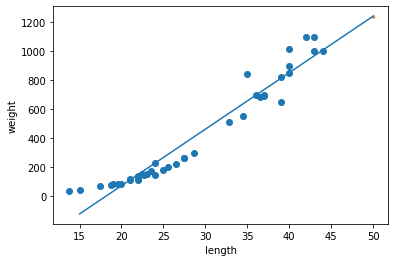

In [ ]:
#선형 회귀
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)
print()

plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50,1241,8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
'''
훈련 세트의 점수도 그닥 높지 않으므로 과소적합되었다고 볼 수 있음
'''

0.9398463339976039
0.8247503123313558


'\n훈련 세트의 점수도 그닥 높지 않으므로 과소적합되었다고 볼 수 있음\n'

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276



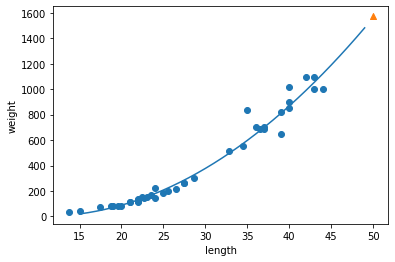


0.9706807451768623
0.9775935108325122


In [ ]:
#위 의 그래프에 왼쪽 밑으로 쭉 내려 가고 있음, 0g이하로 갈텐데 있을 수가 없는 일
#그래서 최적의 직선보다 최선의 곡선으로 추세선을 표현
import numpy as np
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

train_poly=np.column_stack((train_input**2, train_input))
test_poly=np.column_stack((test_input**2, test_input))

lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

'''
다항식을 이용한 선형 회귀를 다항 회귀라 부름
'''

print()
point=np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2-21.6*point+116.05)

plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print()
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

In [ ]:
#3.3 특성 공학과 규제
#다중 회귀
#판다스 데이터프레임을 만들기 위해 많이 사용하는 파일은 CSV 파일.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df=pd.read_csv('https://bit.ly/perch_csv_data')
perch_full=df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


train_input, test_input, train_target, test_target=train_test_split(perch_full, perch_weight, random_state=42)

#사이킷런의 변환기
'''
사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공
사이킷런의 모델 클래스에 일관된 fit, score, predic 메서드가 있는 것처럼 변환기 클래스는 fit, transform 메서드 제공
'''
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]])) #[[1. 2. 3. 4. 6. 9.]]
'''
PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항 추가
1은 왜 추가?
1은 기본적으로 특성에 추가
(길이, 두께, 높이, 1)
include_bias=False로 지정하여 다시 특성을 변환
'''

poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)

poly.get_feature_names() #['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

[[1. 2. 3. 4. 6. 9.]]
(42, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [ ]:
#PolynomialFeatuers 클래스의 degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정 가능
#5제곱까지 특성을 만들어 출력
poly=PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)
lr.fit(train_poly,train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
'''
특성의 개수를 늘리면 선형 모델은 아주 강력해짐
훈련 세트에 대해 거의완벽하게 학습 가능
하지만 이런 모델은 훈련 세트에 너무 과대적합하므로 테스트 세트에서는 형편 없는 점수를 출력
'''


(42, 55)
0.9999999999991096
-144.40579242335605


In [ ]:
#과대적합을 줄이는 또 다른 방법
#(특성 개수 줄이는 방법 말고)
#규제
#머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
#선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일
'''
규제를 적용하기위해 먼저 정규화
사이킷런에서 제공하는 StandardScalar 클래스사용
이 클래스도 변환기 의 하나
'''
from sklearn.preprocessing import StandardScaler #표준편차로 정규화
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [ ]:
'''
선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부름
릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘는 계수의 절댓값을 기준으로 규제 적용
일반적으로 릿지를 더 선호
두 알고리즘 모두 게수의 크기를 줄이지만 라쏘는 아예 0으로 만들수도 있음
사이킷런이 두 알고리즘 모두 제공
'''
#릿지 회귀
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


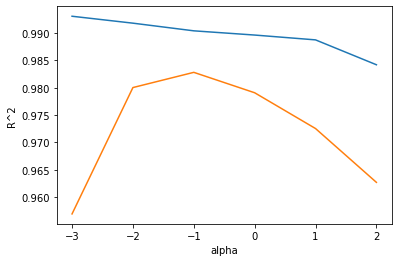

0.9903815817570366
0.9827976465386927


In [ ]:
'''
위와 같이 테스트 세트 점수가 정상으로 돌아옴
릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절 가능
모델 객체를 만들 때 alpha 매개변수로 규제의 강도 조절
alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 높아짐
'''

import matplotlib.pyplot as plt
train_score=[]
test_score=[]
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))


plt.plot(np.log10(alpha_list), train_score) #0.001부터 10배씩 이기 때문에 너무 촘촘해짐 그래서 numpy에 있는 자연로그 사용
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

#최종 모델 훈련
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


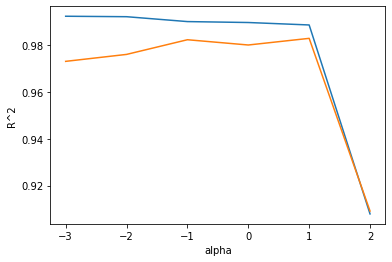

0.9888067471131867
0.9824470598706695
40


In [ ]:
#라쏘 회귀(계수의 절대값)
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

train_score=[]
test_score=[]
alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso=Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

lasso=Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_==0))